In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [3]:
path = '/Users/vaibhavkrishnabhosle/Desktop/Projects/Coursera/Data Visualization with Python by IBM/Topic_Survey_Assignment.csv'
df_ds_survey = pd.read_csv(path, index_col = 0)
df_ds_survey

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
#for sorting values
df_ds_survey.sort_values(['Very interested'], axis=0, ascending=False, inplace=True)
df_ds = round((df_ds_survey/2233)*100,2)
df_ds

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


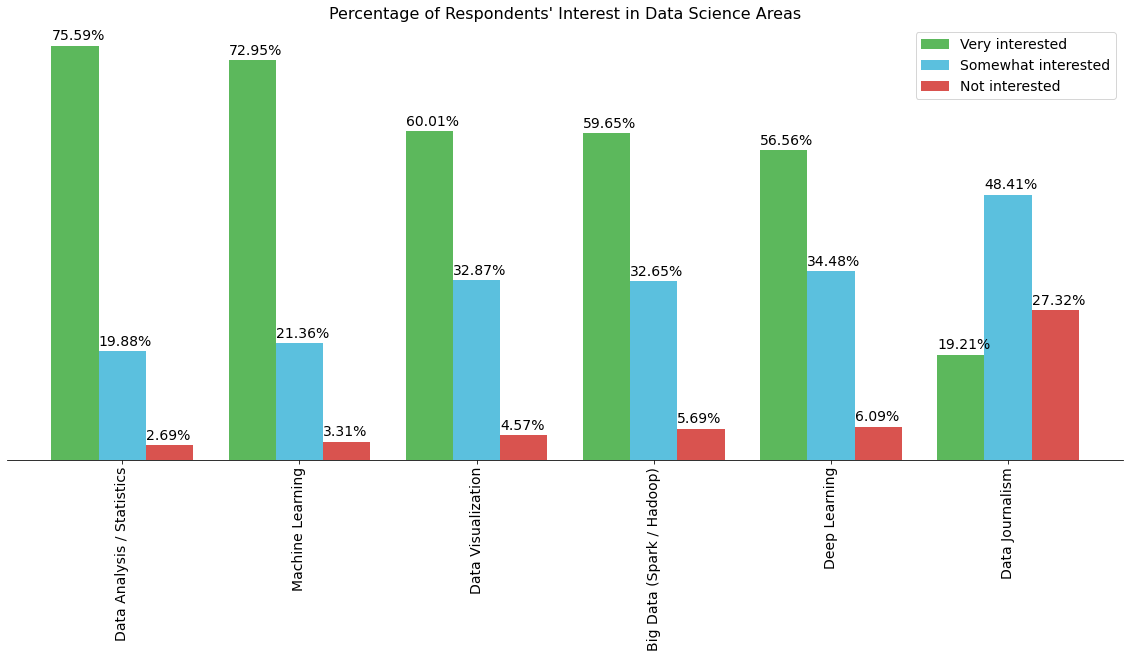

In [6]:
ax = df_ds.plot(kind = 'bar', 
                figsize = (20,8), rot = 90, 
                width = 0.8, 
                color = ['#5cb85c', '#5bc0de', '#d9534f'], 
                fontsize = 14)

ax.set_title("Percentage of Respondents' Interest in Data Science Areas", fontsize = 16 )
ax.legend(fontsize=14, facecolor = 'white')
plt.yticks([])

# Removing the Border 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#display the percentages above the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x(), p.get_height() + 1), fontsize = 14)

In [14]:
path = '/Users/vaibhavkrishnabhosle/Desktop/Projects/Coursera/Data Visualization with Python by IBM/Police_Department_Incidents_-_Previous_Year__2016_.csv'
df_sanfran = pd.read_csv(path)

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [15]:
df_sanfran.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [16]:
# data preparation
df_nh = df_sanfran[['PdDistrict', 'X']]

# data groupting and obtaining count
df_nh = df_nh.groupby(['PdDistrict']).count()
df_nh.reset_index(inplace = True)
df_nh.columns = ['Neighborhood', 'Count']
df_nh

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [21]:
# Read in the GeoJSON file
path = '/Users/vaibhavkrishnabhosle/Desktop/Projects/Coursera/Data Visualization with Python by IBM/san-francisco.geojson'
import geojson
with open(path) as f:
    gj = geojson.load(f)

# Create the map centering San Fransico
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)

# Display the map
sf_map.choropleth(geo_data=gj,
                  data=df_nh,
                  columns=['Neighborhood', 'Count'],
                  key_on='feature.properties.DISTRICT',
                  fill_color='YlOrRd', 
                  fill_opacity=0.7, 
                  line_opacity=0.2,
                  legend_name='Crime Rate in San Francisco')
sf_map